In [66]:
import networkx as nx
import json
import itertools as it
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
datasetAdr = "./Dataset/full_tweets_dutch_only/full_tweet_dutch_only1.json"

In [3]:
dataset = json.load(open(datasetAdr))

### Co-party Analysis over Dutch Tweets

Do the co-word analysis over Dutch and non Dutch Tweets and analyse the differences

In [11]:
partiesList = ['pvda', 'vvd', 'pvv', 'denk', 'd66', 'fvd', 'cda', 'groenlinks', 'christenunie', 'sgp', 'pvdd', 'sp', '50plus']

In [19]:
prunedDataset = []
for index, datapoint in enumerate(dataset):
    parties = [party for party in partiesList if party in datapoint["text"].lower().strip().replace("@","").replace("#","")]
    dataset[index]["parties"] = parties
    if len(parties)>0:
        prunedDataset.append(dataset[index])

In [38]:
# Party Level Communication Network
plcGraph = nx.Graph()
partyMentions = {p:0 for p in partiesList} #How many a party has been mentioned? (not the way that "mention" means in Twitter vocabulary) 
weightedEdgeList = {}
for tweet in tqdm(prunedDataset):
    for party in tweet["parties"]:
        partyMentions[party] += 1
    if len(tweet["parties"])>1:
        possibileCombinations = it.combinations(tweet["parties"],2)
        for item in possibileCombinations:
            first = (item[0], item[1])
            second = (item[1], item[0])
            if first in weightedEdgeList.keys():
                weightedEdgeList[first] += 1
            elif second in weightedEdgeList.keys():
                weightedEdgeList[second] += 1
            else:
                weightedEdgeList[first] = 1
plcGraph.add_edges_from(list(weightedEdgeList.keys()))
for edge in weightedEdgeList.keys():
    plcGraph[edge[0]][edge[1]]["weight"] = weightedEdgeList[edge]

100%|██████████████████████████████| 102432/102432 [00:00<00:00, 153801.77it/s]


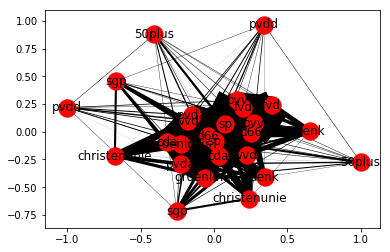

<Figure size 960x800 with 0 Axes>

In [77]:
pos = nx.spring_layout(plcGraph)
nx.draw_networkx_nodes(plcGraph, pos)
nx.draw_networkx_edges(plcGraph, pos, width=[list(plcGraph.edges.data())[i][2]["weight"]/100 for i in range(len(plcGraph.edges))])
nx.draw_networkx_labels(plcGraph, pos)

nx.write_gexf(plcGraph, "plcGraph.gexf")
plt.figure(num=None, figsize=(12, 10), dpi=80)
plt.show()

# Exposure and Credibility networks 

First define the exposure and credibilty indicators, then measure them for Dutch and non-Dutch tweets, then classify the values in three level (Low, Medium and High) and make a bipartite network with following conditions:
Nodes =>
U: Set of Parties
V: Three level (Low, Medium and High)
E: The weight of each edge from U to V denotes the number of tweets in that party which belongs to that credibility category